<a href="https://colab.research.google.com/github/juneansun/2201_ml_colab/blob/main/svm_visual_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
 from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%matplotlib inline

# 사용할 라이브러리를 불러옵니다.
import numpy as np                                    # 배열(array)을 쉽게 사용하기 위한 라이브러리입니다.
import pandas as pd                                   # 데이터를 쉽게 보고 사용하기 위한 라이브러리입니다.
import matplotlib.pyplot as plt                       # 시각화 설정 클래스입니다.

from sklearn.svm import SVC                           # 사용할 머신러닝 알고리즘입니다.

from mlxtend.plotting import plot_decision_regions    # 결정영역 시각화 함수입니다.
from sklearn.decomposition import PCA
from sklearn.metrics import plot_confusion_matrix     # 모델 성능평가를 위한 함수입니다.
from sklearn.metrics import ConfusionMatrixDisplay

plt.rcParams['figure.figsize'] = [16, 8]

# 학습 데이터를 불러옵니다.
train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ML/iris_train.csv', sep=',', encoding='utf-8')
x_train = train.drop(['target', 'target_name'], axis=1).values
y_train = train['target'].values

# 테스트 데이터를 불러옵니다.
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ML/iris_test.csv', sep=',', encoding='utf-8')
x_test = test.drop(['target', 'target_name'], axis=1).values
y_test = test['target'].values

# 사용할 알고리즘을 불러옵니다.
model = SVC(
    C=1.0,               # 정규화 파라미터입니다. 정규화 정도와 C값은 반비례합니다. C값은 반드시 0보다 커야 합니다.
    kernel='rbf',        # Radial basis function 커널을 사용합니다.
)

# 모델을 학습합니다.
model.fit(x_train, y_train)

# 테스트 데이터로 예측합니다.
pred = model.predict(x_test)
test['prediction'] = pred
test['prediction_name'] = test['prediction'].replace({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

# 테스트 데이터로 정확성을 확인합니다.
print('How well learned: ', model.score(x_train, y_train) * 100)
print('Accuracy: ', model.score(x_test, y_test) * 100)

How well learned:  97.0
Accuracy:  96.0


<Figure size 1152x576 with 0 Axes>

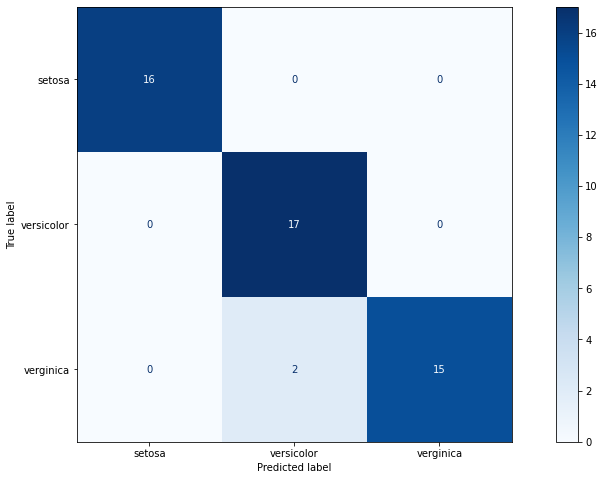

<Figure size 1152x576 with 0 Axes>

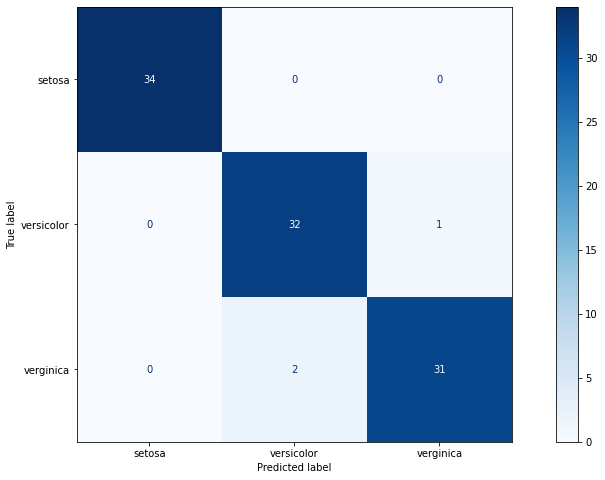

In [ ]:
plt.figure()
ConfusionMatrixDisplay.from_estimator(
    model,
    x_test,
    y_test,
    display_labels=['setosa', 'versicolor', 'verginica'],
    cmap=plt.cm.Blues
)
plt.show()

plt.figure()
ConfusionMatrixDisplay.from_estimator(
    model,
    x_train,
    y_train,
    display_labels=['setosa', 'versicolor', 'verginica'],
    cmap=plt.cm.Blues
)
plt.show()

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


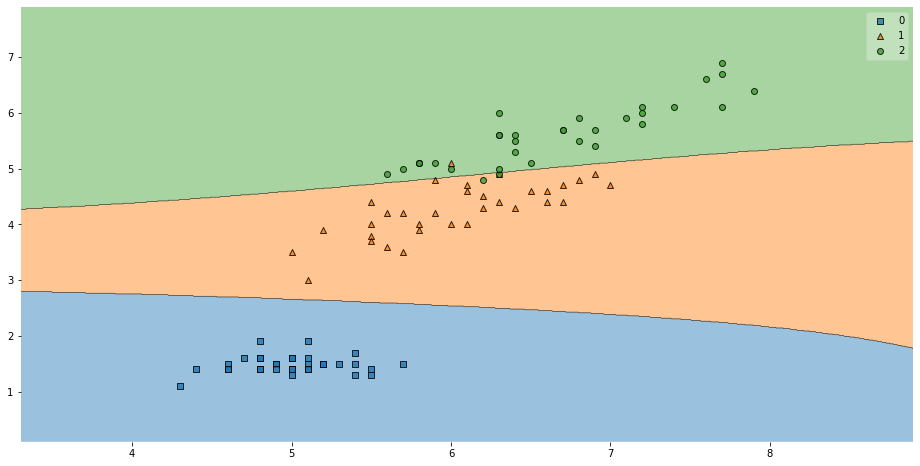

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


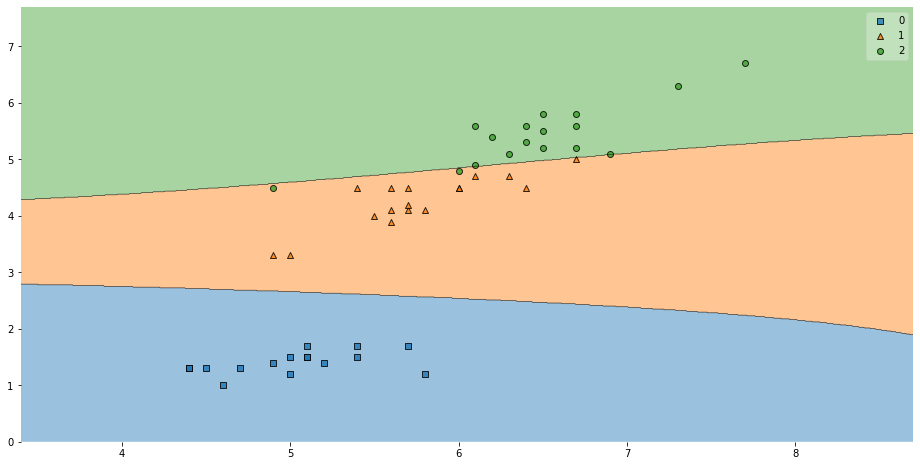

In [ ]:
plt.figure()
plot_decision_regions(
    X=x_train,
    y=y_train,
    clf=model,    # 학습한 모델을 입력합니다.
)
plt.show()

plt.figure()
plot_decision_regions(
    X=x_test,
    y=y_test,
    clf=model,    # 학습한 모델을 입력합니다.
)
plt.show()